In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def draw_image(popout=False):
    image = Image.new(mode="RGB", color=(0, 0, 0), size=(image_size, image_size))
    for i in range(m):
        for j in range(m):
            color = (0, 0, 0) if matrix[i, j] else (255, 255, 255)
            for k in range(i*d, i*d + d):
                for l in range(j*d, j*d + d):
                    image.putpixel((k, l), color)
    display(image)
    if popout:
        image.show()

In [4]:
def prepare_image():
    for i in range(m):
        for j in range(m):
            matrix[i, j] = 1 if np.random.rand() < density else 0
m = 512
image_size = 512
density = 0.5
d = image_size // m
matrix = np.zeros((m, m))
prepare_image()
draw_image()

NameError: name 'image_size' is not defined

In [156]:
draw_image(popout=True)

In [157]:
def single_cell_energy(x, y):
    energy = 0
    energy += abs(matrix[x, y] - matrix[x, y+1])
    energy += abs(matrix[x, y] - matrix[x+1, y])
    energy += abs(matrix[x, y] - matrix[x, y-1])
    energy += abs(matrix[x, y] - matrix[x-1, y])
    return energy

def check_energy(x1, y1, x2, y2):
    return single_cell_energy(x1, y1) + single_cell_energy(x2, y2)

def calculate_initial_energy():
    energy = 0
    for i in range(1, m - 1):
        for j in range(1, m - 1):
            energy += single_cell_energy(i, j)
    return energy

In [ ]:
def check_difference(x1, y1, x2, y2):
    before = check_energy(x1, y1, x2, y2)
    matrix[x1, y1], matrix[x2, y2] = matrix[x2, y2], matrix[x1, y1]
    after = check_energy(x1, y1, x2, y2)
    return (x1, y1), (x2, y2), 2*(after - before)

def check_neighbor():
    x, y = np.random.randint(1, m - 2), np.random.randint(1, m - 2)
    x_d, y_d = 0, 0
    if 1 == np.random.randint(0, 2):
        x_d = 1
    else:
        y_d = 1
    if matrix[x, y] != matrix[x + x_d, y+y_d]:
        return check_difference(x, y, x+x_d, y+y_d)
    else:
        x_d, y_d = y_d, x_d
        if matrix[x, y] == matrix[x + x_d, y+y_d]:
            return None, None, None
        else:
            return check_difference(x, y, x+x_d, y+y_d)

In [ ]:
cur_energy = calculate_initial_energy()

In [ ]:
alpha = 0.999
T0 = 100
T = T0
temperature = [T]
energy_states = [cur_energy]
steps = 100000
probability = []
for i in range(steps):
    for j in range(1000):
        s1, s2, delta = check_neighbor()
        if s1 is None:
            continue
        if delta < 0:
            cur_energy += delta
        else:
            p1 = np.exp((-delta) / T)
            probability.append(p1)
            if p1 > np.random.uniform(0, 1):
                cur_energy += delta
            else:
                matrix[s1[0], s1[1]], matrix[s2[0], s2[1]] = matrix[s2[0], s2[1]] , matrix[s1[0], s1[1]]
        if j % 200 == 0:
            energy_states.append(cur_energy)
    if i % 100 == 0:
        print(i)
    T = T *alpha
    temperature.append(T)

draw_image(popout=True)

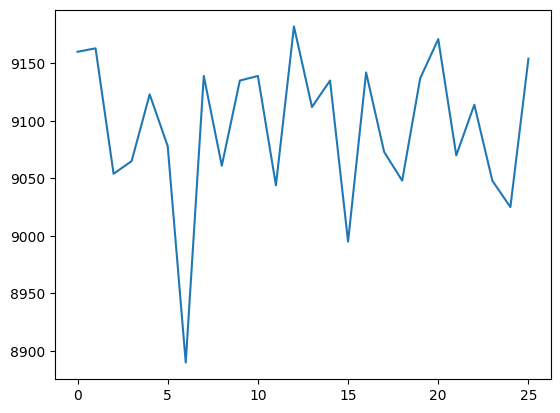

In [150]:
plt.plot([i for i in range(len(energy_states))], energy_states)
plt.show()

In [ ]:
plt.plot([i for i in range(len(probability))], probability)
plt.show()

In [ ]:
plt.plot([i for i in range(len(temperature))], temperature)
plt.show()